## Telecom Churn Case Study by Anup Rana

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

#for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

from sklearn import svm 

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('telecom_churn_data.csv') # reading the csv file
print('shape of the dataframe df:', df.shape)

shape of the dataframe df: (99999, 226)


In [54]:
#Let's have a quick look at the data
df.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00


In [56]:
#List of columns in the dataframe df
print(list(df))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [58]:
#Checking for duplicate rows
sum(df.duplicated(subset = 'mobile_number'))

0

In [60]:
#Let's have some statistical insight
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_avg_amt_good
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373,325.238792
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353,370.833466
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000,115.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000,229.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000,419.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000


### Definitions of Churn:
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.
##### Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.
#### This project demands usage-based definition to define churn

### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
#### As per the problem statement the high-value customers shoud be defined as: 
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [62]:
#Let's identify columns for recharge ('rech')
list_rech = [x for x in list(df) if 'rech' in x]
print(list_rech)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_avg_amt_good']


### Data Preprocessing and Derived Features

So, the high value customers should be defined based on 'total_rech_amt_6' and 'total_rech_amt_7'

In [64]:
#So, let's add the above two columns up to generate the total recharge amount in 'good' phase
df['total_rech_avg_amt_good'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
df_dropped = df.copy()
df_dropped = df_dropped.drop(axis = 1, columns = ['total_rech_amt_6', 'total_rech_amt_7']) #we already have the information stored in the 'total_rech_avg_amt_good' column. So, let's drop the original columns
df_dropped.shape

(99999, 225)

In [66]:
#As per the problem statement, the high value customers are the ones with recharge amount higher than the 70th percentile
df_high = df_dropped[(df_dropped['total_rech_avg_amt_good'] > df_dropped['total_rech_avg_amt_good'].quantile(0.7))]
df_high.shape

(29979, 225)

In [68]:
#As per the problem statement the churn should be defined based on usage data
df_high['total_usage'] = df_high['total_og_mou_9'] + df_high['total_ic_mou_9'] + df_high['vol_2g_mb_9'] + df_high['vol_3g_mb_9']

df_high['churn'] = np.where(df_high['total_usage']== 0, 1, 0)
df_high.shape

(29979, 227)

In [69]:
df_high['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [70]:
#Calculating the churn rate
print('churn rate:', df_high['churn'].sum()*100/len(df_high['churn']))

churn rate: 8.636045231662164


Note: The Churn rate is really low. So, our dataset is imbalanced

In [71]:
#As we have already generated the 'churn' column, the 'total_usage' is of no use, Let's drop it
df_high.drop('total_usage', axis = 1, inplace = True)
df_high.shape

(29979, 226)

In [72]:
#Another important thing is that all the columns corresponding to 9 (september) is not relevent for us now.
#Because we want to predict the 'churn' of 9 based on the data from 6 and 7
#So, let's drop the other columns for the month of 9
cols_sep = [x for x in list(df) if '_9' in x or 'sep' in x or 'Sep' in x or 'September' in x or 'september' in x]
df_high = df_high.drop(cols_sep, axis = 1)
df_high.shape

(29979, 171)

In [73]:
#getting the coulmns with only one unique value
cols_to_remove = []
for i in list(df_high):
    if len(df_high[i].value_counts()) == 1:
        cols_to_remove.append(i)
print(cols_to_remove)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [74]:
#So, above columns should not have any predictive power and we can drop them
df_high = df_high.drop(cols_to_remove, axis = 1)
df_high.shape

(29979, 158)

In [75]:
#percentage of null values (non zero) in differend columns
col_list = list(df_high)
null = []
for i in df_high.isnull().sum()*100/df_high.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
4,onnet_mou_6,1.054071
5,onnet_mou_7,1.010707
6,onnet_mou_8,3.128857
7,offnet_mou_6,1.054071
8,offnet_mou_7,1.010707
9,offnet_mou_8,3.128857
10,roam_ic_mou_6,1.054071
11,roam_ic_mou_7,1.010707
12,roam_ic_mou_8,3.128857
13,roam_og_mou_6,1.054071


So, there are 114 columns having null values

In [76]:
#Let's check the columns with very large number (>= 50%) of null values
col_list = list(df_high)
null = []
for i in df_high.isnull().sum()*100/df_high.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] >= 50].shape

(30, 2)

So there are 30 columns with very high null values

In [77]:
#Let's check how relevent these 30 columns are
correlation = []

lst = list(df_null[df_null['% null'] >= 50]['columns'])

NonNumCols = []
NumCols = []

for col in list(df_high[lst]):
    if df_high[lst][col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
        
for i in NumCols:
    corr = round(list(df_high[['churn', i]].corr()[i])[0], 3)
    correlation.append(corr)

print(correlation)

[0.017, 0.016, -0.028, -0.008, -0.004, -0.047, 0.009, 0.007, -0.021, 0.018, 0.019, -0.022, -0.012, -0.014, -0.057, 0.017, 0.006, -0.031, 0.021, 0.012, -0.028, 0.014, 0.007, -0.001, -0.021, -0.013, -0.084]


Note: Almost there is no correlation between these 30 columns and churn

In [78]:
#Looks like that all the numerical columns with very high (>= 50%) null values are not of much importance for our model building.
#So, we can drop these columns
df_high = df_high.drop(NumCols, axis = 1)
df_high.shape

(29979, 131)

In [79]:
NonNumCols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [80]:
#imputing the missing values with the mod
for i in NonNumCols:
    df_high[i].fillna(df_high[i].mode()[0], inplace=True)

In [81]:
#List of columns related to 'date'
cols_date = [x for x in list(df_high) if 'date' in x]
print(cols_date)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [82]:
#Extracting day from the date
for i in cols_date:
    df_high[i] = pd.to_datetime(df_high[i]).dt.day

In [83]:
#imputing with median value
col_null = df_high.columns[df_high.isnull().sum() > 0]
for i in col_null:
    df_high[i].fillna((df_high[i].median()), inplace=True)

In [84]:
#Checking whether imputation is complete or not
col_list = list(df_high)
null = []
for i in df_high.isnull().sum()*100/df_high.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null


So, there is no null value now

In [85]:
df_high.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_avg_amt_good,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0,0,0,0,2607,0.00,0.00,0.00,380.0,0


In [86]:
#Checking number of numerical and non-numerical columns
NonNumCols = []
NumCols = []

for col in list(df_high):
    if df_high[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
        
print('Number of numerical columns:' ,len(NumCols))
print('Number of non-numerical columns:', len(NonNumCols))

Number of numerical columns: 131
Number of non-numerical columns: 0


### Outlier Treatment

In [87]:
df_high.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_avg_amt_good,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,...,0.173321,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,697.014644,0.08636
std,6.846594e+05,442.848876,463.049067,492.447887,460.257092,481.318377,465.205131,468.998414,485.030117,473.464516,...,0.583178,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,488.925223,0.28090
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,369.000000,0.00000
1%,7.000028e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,371.500000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,397.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,569.000000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,796.000000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,1.000000,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,1118.100000,0.00000


From the statistics above it is clear that we have outliers in the dataset

In [88]:
df_high.shape

(29979, 131)

In [89]:
#Removing the entries above 99 percentile and below 1 percentile
cols = [col for col in list(df_high) if col not in ['churn','mobile_number']]

for col in cols:
    ptls = df_high[col].quantile([0.01,0.99]).values
    df_high[col][df_high[col] <= ptls[0]] = ptls[0]
    df_high[col][df_high[col] >= ptls[1]] = ptls[1]

In [90]:
df_high.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_avg_amt_good,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,578.115790,579.934200,524.618925,288.909740,296.580898,261.866393,413.363109,418.408660,373.082685,...,0.163815,0.100304,0.103239,0.093966,1263.461223,120.468609,126.130999,112.271333,686.128273,0.08636
std,6.846594e+05,336.036348,338.202040,370.788082,404.375323,419.262037,398.634242,420.037947,429.176148,401.058913,...,0.505309,0.427528,0.442786,0.431060,973.137375,318.585454,337.364761,313.189126,347.666592,0.28090
min,7.000000e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,371.500000,0.00000
1%,7.000028e+09,18.228064,25.732732,0.000000,0.000000,0.000000,0.000000,1.059516,1.107580,0.000000,...,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,371.500000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,397.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,569.000000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,796.000000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,1.000000,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,1118.100000,0.00000


Now all the outliers are removed

In [91]:
df_high.shape

(29979, 131)

### EDA

In [ ]:
#Correlations
correlation = df_high.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation, annot = True)

In [ ]:
#Some important features
fig = plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
sns.boxplot(x='churn', y='total_ic_mou_8', data = df_high)

plt.subplot(2,2,2)
sns.boxplot(x='churn', y='total_og_mou_8', data = df_high)

plt.subplot(2,2,3)
sns.boxplot(x='churn', y='total_rech_amt_8', data = df_high)

plt.subplot(2,2,4)
sns.boxplot(x='churn', y='last_day_rch_amt_8', data = df_high)

In [ ]:
sns.boxplot(x='churn', y='max_rech_amt_8', data = df_high)

In [ ]:
sns.boxplot(x='churn', y='arpu_8', data = df_high)

In [ ]:
sns.pairplot(data=df_high[['last_day_rch_amt_8','loc_ic_t2m_mou_8','max_rech_amt_8', 'loc_ic_mou_8',
                           'roam_ic_mou_8', 'date_of_last_rech_8', 'roam_og_mou_8', 'loc_og_mou_8',
                           'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
                           'total_rech_num_8', 'loc_og_t2f_mou_8', 'std_ic_mou_8', 'std_ic_t2m_mou_8', 'churn']],
             hue='churn')

### Scaling

In [92]:
scaler = StandardScaler()

In [93]:
X = df_high.drop(['churn','mobile_number'], axis=1)

y = df_high['churn']

In [94]:
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20985, 129)
y_train shape: (20985,)
X_test shape: (8994, 129)
y_test shape: (8994,)


### PCA

In [96]:
pca = PCA(svd_solver = 'randomized', random_state = 50)

In [97]:
#doing the PCA on X_train
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='randomized', tol=0.0, whiten=False)

In [98]:
pca.components_

array([[ 8.51923498e-02,  9.09253315e-02,  1.05437427e-01, ...,
         6.22423862e-02,  5.87374949e-02,  9.98693649e-02],
       [ 1.25939947e-01,  1.61270126e-01,  1.51340675e-01, ...,
        -6.89059392e-02, -6.85765538e-02,  1.63026916e-01],
       [ 9.94445207e-02,  1.37439955e-01,  1.39686622e-01, ...,
         2.00366718e-01,  1.91522496e-01,  1.35510770e-01],
       ...,
       [-1.44904287e-03,  5.68573714e-03, -1.20193488e-03, ...,
         1.74361586e-04,  2.04688470e-04, -9.38226879e-04],
       [-0.00000000e+00, -2.75044744e-17,  1.75395335e-16, ...,
        -1.28399911e-17, -3.05170746e-16, -3.17689611e-17],
       [ 0.00000000e+00,  5.69383031e-17,  3.77311167e-17, ...,
        -9.53330820e-18,  2.05922261e-17, -1.18926975e-17]])

In [99]:
pca.explained_variance_ratio_

array([1.14156320e-01, 9.08194612e-02, 5.96756775e-02, 4.98655159e-02,
       4.18111194e-02, 3.71421256e-02, 2.88174376e-02, 2.75806679e-02,
       2.63106415e-02, 2.47115396e-02, 2.38755014e-02, 2.34275253e-02,
       2.00544324e-02, 1.91245273e-02, 1.72284853e-02, 1.63022875e-02,
       1.56117863e-02, 1.28859709e-02, 1.19539537e-02, 1.15220543e-02,
       1.10878919e-02, 1.08005242e-02, 1.02638551e-02, 9.56318692e-03,
       9.09547163e-03, 8.65438932e-03, 8.46734560e-03, 8.15471631e-03,
       7.88395265e-03, 7.43440707e-03, 7.37873013e-03, 7.14616069e-03,
       6.89663830e-03, 6.68175366e-03, 6.61708171e-03, 6.39380112e-03,
       6.30538370e-03, 6.18857052e-03, 6.10135567e-03, 5.93971751e-03,
       5.83751296e-03, 5.77870079e-03, 5.61518995e-03, 5.33940686e-03,
       5.23069235e-03, 5.15436561e-03, 5.04277620e-03, 4.85827652e-03,
       4.62879201e-03, 4.53076332e-03, 4.43256952e-03, 4.33806385e-03,
       4.02936636e-03, 3.81725570e-03, 3.68271515e-03, 3.53174332e-03,
      

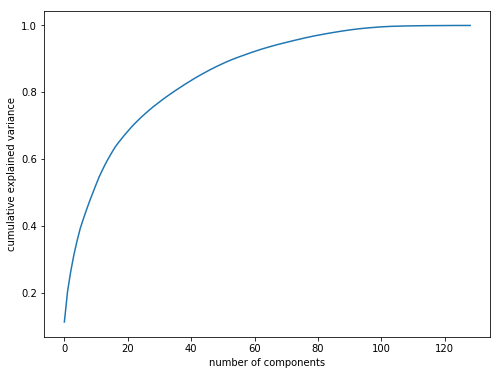

In [100]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [101]:
pca_final = IncrementalPCA(n_components=20) #20 components are enough to explain >90% variance

X_train_pca = pca_final.fit_transform(X_train) #PCA on train dataset
X_train_pca.shape

(20985, 20)

In [102]:
#Maximum and minimum correlations after PCA
corr = np.corrcoef(X_train_pca.transpose())
corr_nodiag = corr - np.diagflat(corr.diagonal())
print("max_corr:", corr_nodiag.max(), 'and', "min_corr:", corr_nodiag.min(),)

max_corr: 0.003368253477152489 and min_corr: -0.006748229859277252


So, after PCA we dont have any multicolinearity

In [50]:
#PCA on test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8994, 20)

### Model Building

#### Logistic Regression

In [51]:
lr_pca = LogisticRegression(class_weight='balanced') #class_weight='balanced' was used due to class imbalance in the dataset
model_lr_pca = lr_pca.fit(X_train_pca, y_train)

In [52]:
#predictions on train dataset
pred_train = model_lr_pca.predict_proba(X_train_pca)
y_pred_train = model_lr_pca.predict(X_train_pca)

#predictions on test dataset
pred_test = model_lr_pca.predict_proba(X_test_pca)
y_pred_test = model_lr_pca.predict(X_test_pca)

In [53]:
print(confusion_matrix(y_train, y_pred_train))
print('Accuracy Score in train dataset:', accuracy_score(y_train, y_pred_train))
print('Accuracy Score in test dataset:', accuracy_score(y_test, y_pred_test))

[[15741  3470]
 [  311  1463]]
Accuracy Score in train dataset: 0.819823683583512
Accuracy Score in test dataset: 0.8186568823660217


In [54]:
y_pred_df = pd.DataFrame(pred_train) #converting array to dataframe
y_pred_df_test = pd.DataFrame(pred_test)

y_pred = y_pred_df.iloc[:,[1]] #Converting to column dataframe
y_pred_test = y_pred_df_test.iloc[:,[1]]

y_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_pred_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_train, y_pred], axis=1)
y_pred_final_test = pd.concat([y_test, y_pred_test], axis=1)
 
y_pred_final = y_pred_final.rename(columns = { 1 : 'churn_prob'}) #Renaming the column
y_pred_final_test = y_pred_final_test.rename(columns = { 1 : 'churn_prob'})

In [55]:
#ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [56]:
#AUC
fpr, tpr, thresholds =roc_curve(y_pred_final.churn, y_pred_final.churn_prob)
auc = auc(fpr, tpr)
print('AUC:', auc)

AUC: 0.8778135670933078


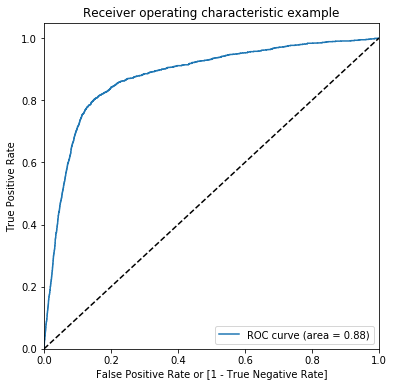

(array([0.        , 0.        , 0.        , ..., 0.99989589, 0.99994795,
        1.        ]),
 array([0.00000000e+00, 5.63697858e-04, 1.12739572e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99931857e+00, 9.99318570e-01, 9.98284686e-01, ...,
        8.03166202e-05, 6.35320348e-05, 1.77551213e-05]))

In [57]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [58]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
#y_pred_final.head()

In [59]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084537  0.000000  1.000000
0.1   0.1  0.329855  0.270210  0.975761
0.2   0.2  0.505599  0.465358  0.941375
0.3   0.3  0.645127  0.620998  0.906426
0.4   0.4  0.748249  0.736870  0.871477
0.5   0.5  0.819824  0.819374  0.824690
0.6   0.6  0.867524  0.876633  0.768884
0.7   0.7  0.893972  0.915882  0.656708
0.8   0.8  0.909126  0.948779  0.479707
0.9   0.9  0.914367  0.978190  0.223224


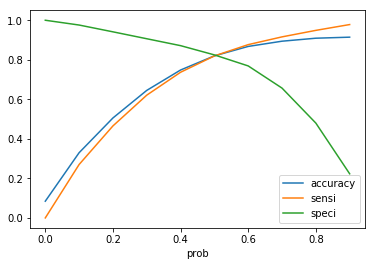

In [60]:
#accuracy vs. sensitivity vs. specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [61]:
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

#Finding optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5044982083862755]


In [62]:
#Creating new column 'pred_churn' with 1 if churn_prob > 0.52 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)

y_pred_final.churn.value_counts()

0    19211
1     1774
Name: churn, dtype: int64

In [63]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.pred_churn)
confusion

array([[15741,  3470],
       [  311,  1463]], dtype=int64)

In [64]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print('Accuracy Score:', accuracy_score(y_train, y_pred_final['pred_churn']))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Predictive Value:', TP/float(TP+FP))
print('Negative Predictive Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.819823683583512
Sensitivity: 0.8246899661781285
Specificity: 0.819374316797668
False Postive Rate: 0.180625683202332
Positive Predictive Value: 0.29657409284411107
Negative Predictive Value: 0.9806254672314977
Misclassification Rate: 0.18017631641648796


In [65]:
#churn prediction in test dataset
y_pred_final_test['pred_churn'] = y_pred_final_test.churn_prob.map( lambda x: 1 if x > 0.50 else 0)
confusion = metrics.confusion_matrix(y_pred_final_test.churn, y_pred_final_test.pred_churn)

TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print('Accuracy Score:', accuracy_score(y_test, y_pred_final_test['pred_churn']))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Predictive Value:', TP/float(TP+FP))
print('Negative Predictive Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.8186568823660217
Sensitivity: 0.8171779141104294
Specificity: 0.8188042547988752
False Postive Rate: 0.18119574520112483
Positive Predictive Value: 0.3100558659217877
Negative Predictive Value: 0.9782354659655274
Misclassification Rate: 0.1813431176339782


In [66]:
from sklearn.model_selection  import StratifiedKFold
st_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)

In [67]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(Cs= list(np.power(10.0, np.arange(-10, 10))), penalty='l2', scoring='roc_auc', cv=st_Kfold, 
                                random_state=999, max_iter=100, fit_intercept=True, solver='newton-cg', tol=1, verbose = 2,
                                n_jobs = -1)

In [68]:
searchCV.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=999, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

In [69]:
pred_L2Search_train = searchCV.predict(X_train_pca)
pred_L2Search_test = searchCV.predict(X_test_pca)
pred_L2Search_prob_train = searchCV.predict_proba(X_train_pca)[:,1]
pred_L2Search_prob_test = searchCV.predict_proba(X_train_pca)[:,1]
print('Report for the train dataset:', '\n', classification_report(y_train, pred_L2Search_train))
print('Report for the test dataset:', '\n', classification_report(y_test, pred_L2Search_test))

accuracy_train = metrics.accuracy_score(y_train, pred_L2Search_train)
accuracy_test = metrics.accuracy_score(y_test, pred_L2Search_test)
print("Accuracy in train dataset:", accuracy_train)
print("Accuracy in test dataset:", accuracy_test)

Report for the train dataset: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     19211
           1       0.54      0.17      0.26      1774

    accuracy                           0.92     20985
   macro avg       0.73      0.58      0.61     20985
weighted avg       0.89      0.92      0.90     20985

Report for the test dataset: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      8179
           1       0.56      0.17      0.26       815

    accuracy                           0.91      8994
   macro avg       0.74      0.58      0.61      8994
weighted avg       0.89      0.91      0.89      8994

Accuracy in train dataset: 0.9175125089349535
Accuracy in test dataset: 0.9126084056037358


In [70]:
confusion = confusion_matrix(y_train, pred_L2Search_train)
confusion

array([[18952,   259],
       [ 1472,   302]], dtype=int64)

In [71]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print('Accuracy Score:', accuracy_score(y_train, pred_L2Search_train))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Predictive Value:', TP/float(TP+FP))
print('Negative Predictive Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.9175125089349535
Sensitivity: 0.17023675310033823
Specificity: 0.9865181406485868
False Postive Rate: 0.013481859351413253
Positive Predictive Value: 0.5383244206773619
Negative Predictive Value: 0.9279279279279279
Misclassification Rate: 0.08248749106504646


In [72]:
confusion = confusion_matrix(y_test, pred_L2Search_test)
confusion

array([[8071,  108],
       [ 678,  137]], dtype=int64)

In [73]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print('Accuracy Score:', accuracy_score(y_test, pred_L2Search_test))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Predictive Value:', TP/float(TP+FP))
print('Negative Predictive Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.9126084056037358
Sensitivity: 0.16809815950920245
Specificity: 0.9867954517667197
False Postive Rate: 0.013204548233280352
Positive Predictive Value: 0.5591836734693878
Negative Predictive Value: 0.9225054291919077
Misclassification Rate: 0.08739159439626418


#### Random Forest with PCA

In [74]:
rf_balanced = RandomForestClassifier(class_weight="balanced_subsample", n_estimators = 1000, max_depth = 6, min_samples_split=5)

In [75]:
trained_rf = rf_balanced.fit(X_train_pca, y_train)

In [76]:
pred_rf_train = trained_rf.predict(X_train_pca)
pred_rf_test = trained_rf.predict(X_test_pca)
pred_prob_rf_train = trained_rf.predict_proba(X_train_pca)[:,1]
pred_prob_rf_test = trained_rf.predict_proba(X_test_pca)[:,1]

accuracy_train = metrics.accuracy_score(y_train, pred_rf_train)
accuracy_test = metrics.accuracy_score(y_test, pred_rf_test)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train, pred_rf_train))
print('Classification report on test dataset:', '\n', classification_report(y_test, pred_rf_test))

Accuracy in train dataset: 0.868382177746009
Accuracy in test dataset: 0.8589059372915276
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92     19211
           1       0.37      0.82      0.51      1774

    accuracy                           0.87     20985
   macro avg       0.68      0.85      0.72     20985
weighted avg       0.93      0.87      0.89     20985

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      8179
           1       0.36      0.73      0.48       815

    accuracy                           0.86      8994
   macro avg       0.67      0.80      0.70      8994
weighted avg       0.91      0.86      0.88      8994



ROC AUC in train dataset 0.913045959611757


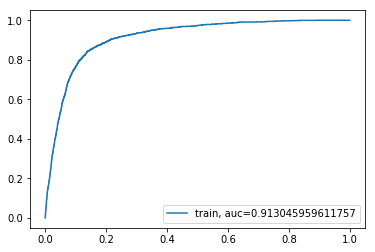

In [77]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_rf_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in train dataset 0.8776615558174196


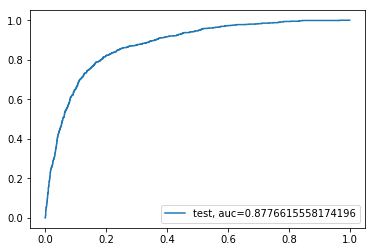

In [78]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rf_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### Random Forest with all features

In [79]:
rf_all = RandomForestClassifier(class_weight='balanced', n_estimators = 1000, max_depth = 6, min_samples_split=5)

In [80]:
trained_rf_all = rf_all.fit(X_train, y_train)

In [81]:
preds_train = trained_rf_all.predict(X_train)
preds_test = trained_rf_all.predict(X_test)

pred_prob_train = trained_rf_all.predict_proba(X_train)[:,1]
pred_prob_test = trained_rf_all.predict_proba(X_test)[:,1]

In [82]:
accuracy_train_rf_all = metrics.accuracy_score(y_train, preds_train)
accuracy_test_rf_all = metrics.accuracy_score(y_test, preds_test)

print('Accuracy in the train dataset:', accuracy_train_rf_all)
print('Accuracy in the test dataset:', accuracy_test_rf_all)

print('Classification report on train dataset:', '\n', classification_report(y_train, preds_train))
print('Classification report on test dataset:', '\n', classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9192756730998333
Accuracy in the test dataset: 0.9093840338003113
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     19211
           1       0.51      0.82      0.63      1774

    accuracy                           0.92     20985
   macro avg       0.75      0.87      0.79     20985
weighted avg       0.94      0.92      0.93     20985

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      8179
           1       0.50      0.76      0.60       815

    accuracy                           0.91      8994
   macro avg       0.74      0.84      0.78      8994
weighted avg       0.93      0.91      0.92      8994



ROC AUC in train dataset 0.9543302916751295


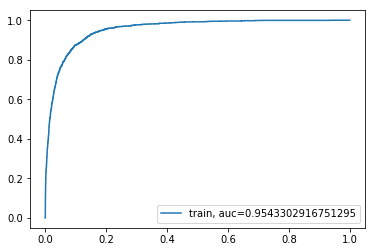

In [83]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_train)
auc_train_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc_train_rf_all)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_train_rf_all))
plt.legend(loc = 4)

ROC AUC in test dataset 0.9303610848371973


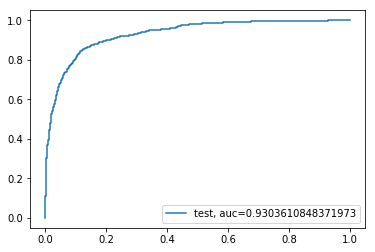

In [84]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_test)
auc_test_rf_all = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc_test_rf_all)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_test_rf_all))
plt.legend(loc = 4)

#### Naive Bayes

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

Minmaxscaler = MinMaxScaler()
X_scaled = Minmaxscaler.fit_transform(X)

X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=50)

mnb = MultinomialNB(alpha = 0, fit_prior= True)

mnb.fit(X_train_mnb,y_train_mnb)

preds_train_mnb = mnb.predict(X_train_mnb)
preds_test_mnb = mnb.predict(X_test_mnb)

accuracy_train = metrics.accuracy_score(y_train_mnb, preds_train_mnb)
accuracy_test = metrics.accuracy_score(y_test_mnb, preds_test_mnb)

print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_mnb, preds_train_mnb))
print('Classification report on test dataset:', '\n', classification_report(y_test_mnb, preds_test_mnb))

Accuracy in the train dataset: 0.9062187276626161
Accuracy in the test dataset: 0.9084945519235046
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     19183
           1       0.44      0.33      0.38      1802

    accuracy                           0.91     20985
   macro avg       0.69      0.65      0.66     20985
weighted avg       0.90      0.91      0.90     20985

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8207
           1       0.47      0.34      0.40       787

    accuracy                           0.91      8994
   macro avg       0.70      0.65      0.67      8994
weighted avg       0.90      0.91      0.90      8994



ROC AUC: 0.6452590688099428


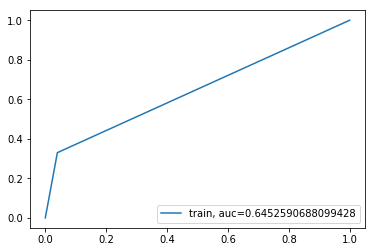

In [86]:
fpr, tpr, threshold = metrics.roc_curve(y_train_mnb, preds_train_mnb)
roc_auc = metrics.auc(fpr, tpr)

print('ROC AUC:', roc_auc)
plt.plot(fpr,tpr,label="train, auc="+str(roc_auc))
plt.legend(loc = 4)

ROC AUC: 0.652894861965078


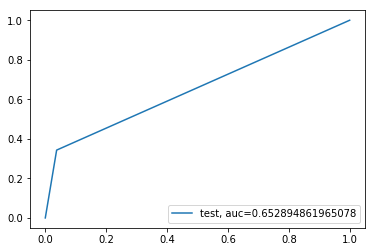

In [87]:
fpr, tpr, threshold = metrics.roc_curve(y_test_mnb, preds_test_mnb)
roc_auc = metrics.auc(fpr, tpr)

print('ROC AUC:', roc_auc)
plt.plot(fpr,tpr,label="test, auc="+str(roc_auc))
plt.legend(loc = 4)

#### XGBoost with all features

In [88]:
xgboost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.001, n_jobs=-1, max_depth=6, colsample_bytree=1, gamma=0.1,
                            cv = None, scoring='f1_weighted', reg_alpha=0, reg_lambda=1, eval_metric='auc',
                           objective='binary:hinge', booster = 'gbtree', tree_method = 'exact', min_child_weight = 15)

xgb_model = xgboost.fit(X_train, y_train)

In [89]:
preds_train = xgb_model.predict(X_train)
preds_test = xgb_model.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, preds_train)
accuracy_test = metrics.accuracy_score(y_test, preds_test)

print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train, preds_train))
print('Classification report on test dataset:', '\n', classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9396711937097927
Accuracy in the test dataset: 0.926840115632644
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     19211
           1       0.62      0.73      0.67      1774

    accuracy                           0.94     20985
   macro avg       0.80      0.84      0.82     20985
weighted avg       0.94      0.94      0.94     20985

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8179
           1       0.58      0.67      0.62       815

    accuracy                           0.93      8994
   macro avg       0.78      0.81      0.79      8994
weighted avg       0.93      0.93      0.93      8994



ROC AUC in train dataset 0.8439996620923151


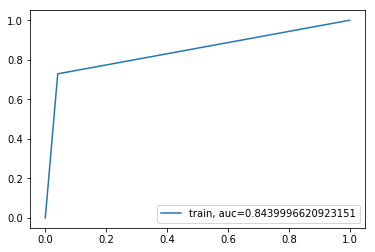

In [90]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, preds_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)

ROC AUC in train dataset 0.8106365471351517


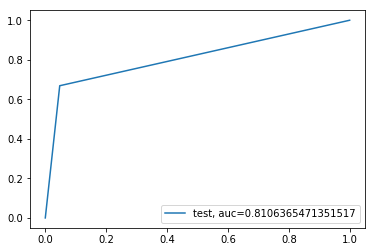

In [91]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)

## Conclusion

* We have attempted different learning algorithms: logistic regression, random forest classifier (with PCA and with all the features), XGBoost, Naive Bayes
* From our model building we can infer that the **Random Forest Classifier** with all the features is the **best candidate**
* XGBoost also performs well but not as good as random forest classifier with all the features

In [92]:
print('Accuracy in the train dataset:', accuracy_train_rf_all)
print('Accuracy in the test dataset:', accuracy_test_rf_all)
print("ROC AUC in train dataset:", auc_train_rf_all)
print("ROC AUC in test dataset:", auc_test_rf_all)

Accuracy in the train dataset: 0.9192756730998333
Accuracy in the test dataset: 0.9093840338003113
ROC AUC in train dataset: 0.9543302916751295
ROC AUC in test dataset: 0.9303610848371973


In [93]:
#Feature importances
importances = trained_rf_all.feature_importances_
cols = X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True), columns={'col_name','importance'})
sorted_feature_importance.head(20) #top 20 features

,col_name,importance
0,0.103987,total_ic_mou_8
1,0.086296,total_og_mou_8
2,0.081720,total_rech_amt_8
3,0.066080,last_day_rch_amt_8
4,0.061477,arpu_8
5,0.046090,loc_ic_t2m_mou_8
6,0.041174,roam_og_mou_8
7,0.039892,loc_ic_mou_8
8,0.038082,date_of_last_rech_8
9,0.037043,loc_og_mou_8


#### Recommendations:
* Previous month is really an important factor for churn prediction. For example to predict churn of 9, month 8 is most important month to consider
* Total incoming and outgoing minutes (of previous month) of usage are the top two deciding factors. If these two decreases in previous month churning probability also increases
* Average revenue per user is the third most important feature. Here also if revenue generating tendency of an user decreases he/she is more likely to churn.